In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

from sklearn import metrics
from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors


import warnings

warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('C:/Users/Sumit/Desktop/NIIT/Projects/project3/DS3_C6_S3_MallCustomers_Data_Project.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.shape

(200, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# EDA

Text(0.5, 1.0, 'Annual Income (k$)')

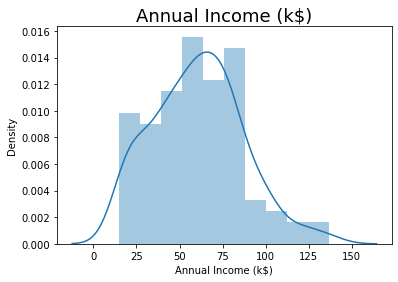

In [10]:
plt.figure(figsize=(6,4))
sns.distplot(df['Annual Income (k$)'])
plt.title('Annual Income (k$)',fontsize=18)

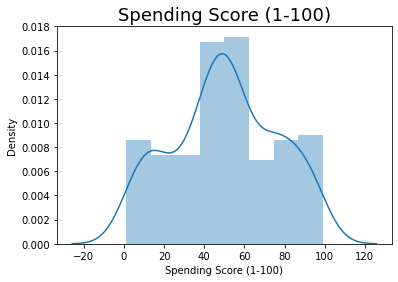

In [11]:
plt.figure(figsize=(6,4))
sns.distplot(df['Spending Score (1-100)']);
plt.title('Spending Score (1-100)',fontsize=18);

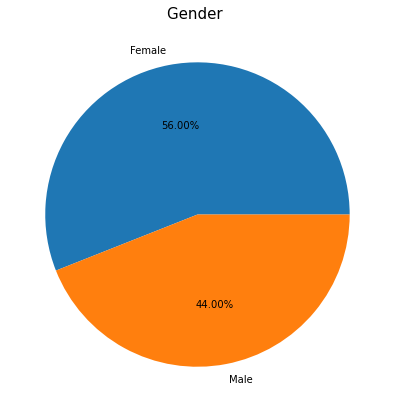

In [13]:
fig, ax = plt.subplots(figsize = (15, 7))
ax.set_title('Gender ',fontsize=15)                  # Set the title of the graph
percentage = df["Gender"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(df["Gender"].value_counts().index) # Converting the index of value counts into list

plt.pie(percentage,labels = labels, explode=[0,0],autopct= "%0.2f%%")  # autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()

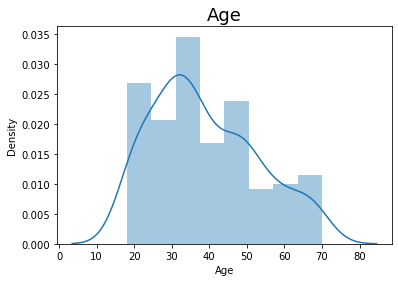

In [15]:
plt.figure(figsize=(6,4))
sns.distplot(df['Age']);
plt.title('Age',fontsize=18);

In [16]:
df['Age'].unique()

array([19, 21, 20, 23, 31, 22, 35, 64, 30, 67, 58, 24, 37, 52, 25, 46, 54,
       29, 45, 40, 60, 53, 18, 49, 42, 36, 65, 48, 50, 27, 33, 59, 47, 51,
       69, 70, 63, 43, 68, 32, 26, 57, 38, 55, 34, 66, 39, 44, 28, 56, 41],
      dtype=int64)

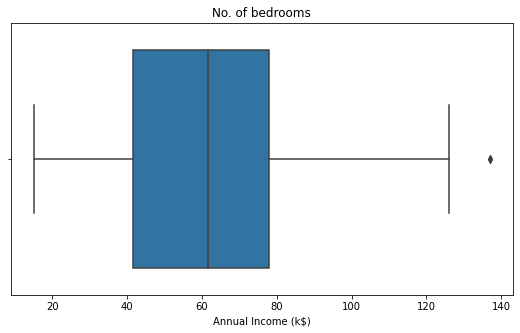

In [19]:
plt.figure(figsize=(9,5))
sns.boxplot('Annual Income (k$)',hue='Gender',data=df)
plt.title('');

Text(0.5, 1.0, 'Expected price floors wise')

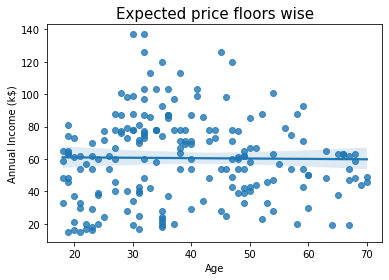

In [20]:
sns.regplot(x='Age',y='Annual Income (k$)',data=df)
plt.title('Expected price floors wise',fontsize=15)

Text(0.5, 1.0, 'Expected price floors wise')

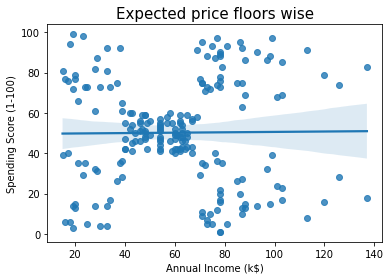

In [22]:
sns.regplot(y='Spending Score (1-100)',x='Annual Income (k$)',data=df)
plt.title('Expected price floors wise',fontsize=15)

In [8]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

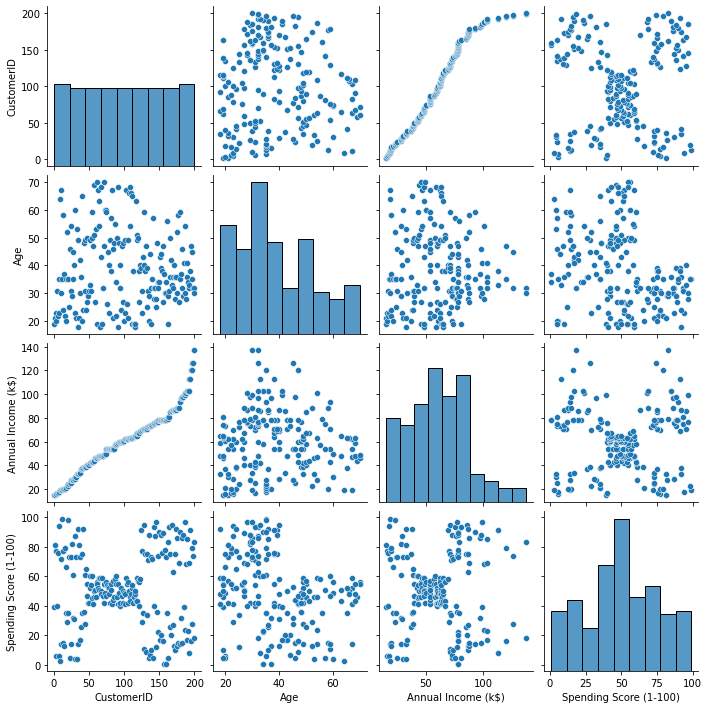

In [23]:
sns.pairplot(df)

In [27]:
corr_df=df.corr()
corr_df['Annual Income (k$)'].sort_values(ascending=False)

Annual Income (k$)        1.000000
CustomerID                0.977548
Spending Score (1-100)    0.009903
Age                      -0.012398
Name: Annual Income (k$), dtype: float64

<AxesSubplot:>

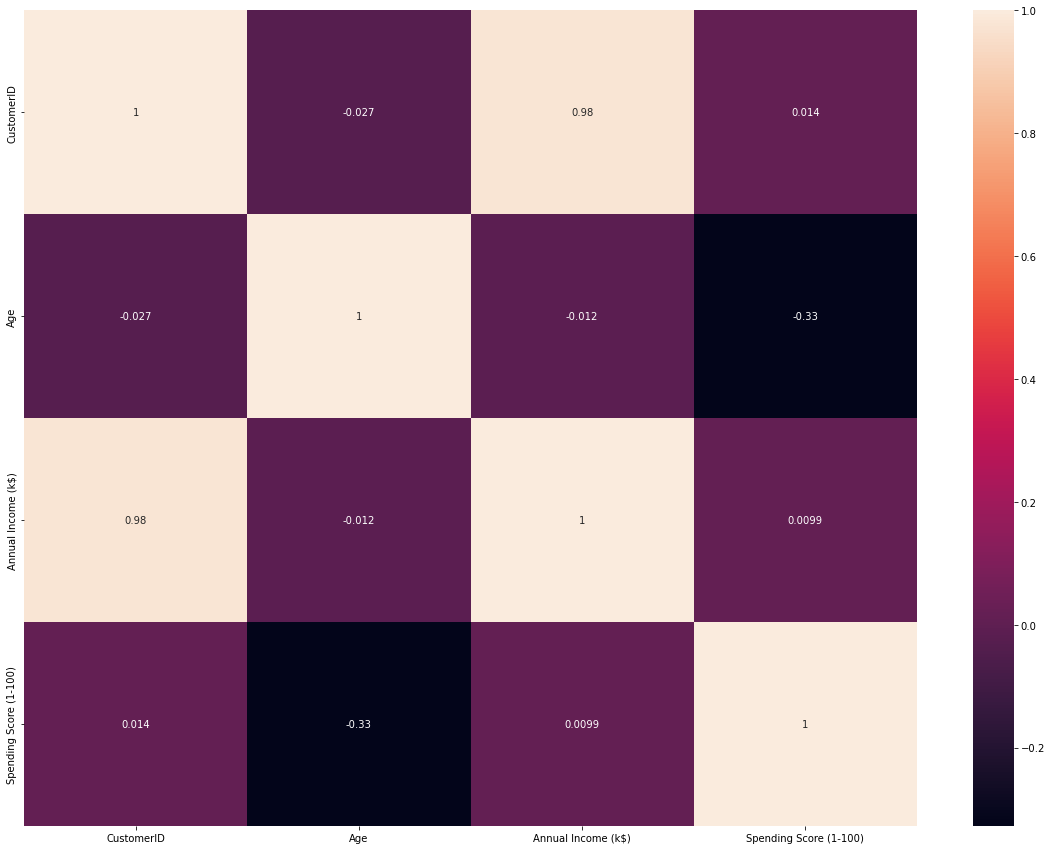

In [28]:
plt.figure(figsize=(20,15))
sns.heatmap(corr_df,annot=True)

In [33]:
df['Gender']=df['Gender'].astype('category')

In [34]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df['Gender']= label_encoder.fit_transform(np.array(df['Gender']).reshape(-1,1))

In [35]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


## Building Model k-means

In [77]:
X=df.iloc[:,[3,4]]
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


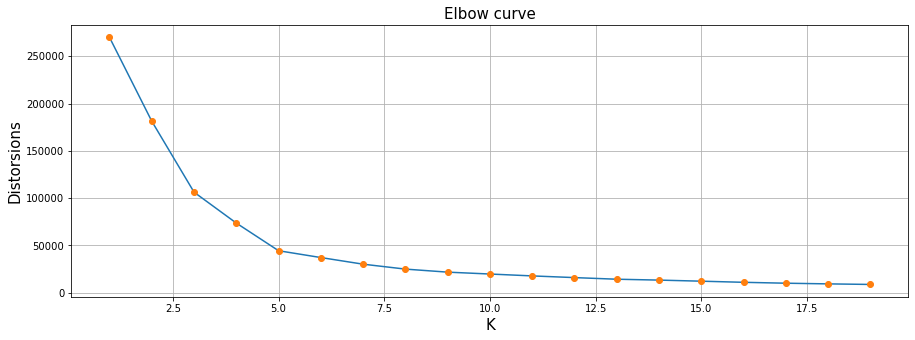

In [63]:
o=[]
distorsions = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)
    o.append(k)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(1, 20), distorsions)
plt.plot(o,distorsions,'o')

plt.grid(True)
plt.xlabel('K',fontsize=15)
plt.ylabel('Distorsions',fontsize=15)
plt.title('Elbow curve',fontsize=15);

For n_clusters = 2 The average silhouette_score is : 0.2968969162503008
For n_clusters = 3 The average silhouette_score is : 0.46761358158775435
For n_clusters = 4 The average silhouette_score is : 0.4931963109249047
For n_clusters = 5 The average silhouette_score is : 0.553931997444648
For n_clusters = 7 The average silhouette_score is : 0.5270287298101395
For n_clusters = 8 The average silhouette_score is : 0.4572211842776841
For n_clusters = 9 The average silhouette_score is : 0.45872989167156364
For n_clusters = 10 The average silhouette_score is : 0.4467356774401869
For n_clusters = 11 The average silhouette_score is : 0.42983405632843386


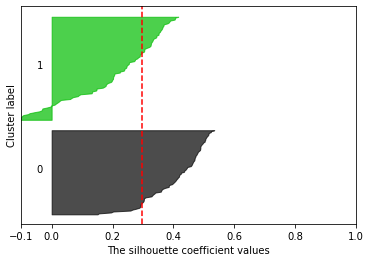

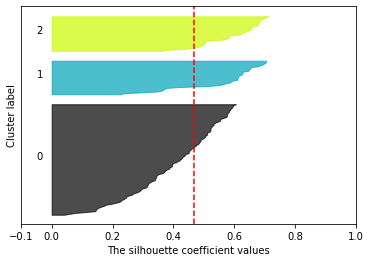

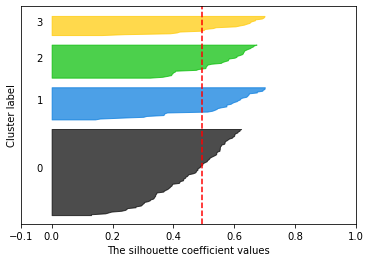

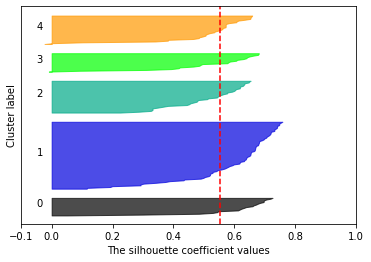

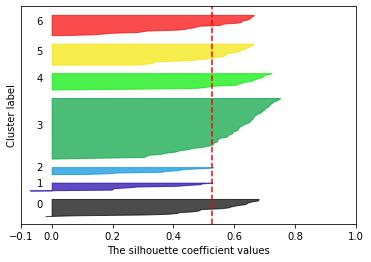

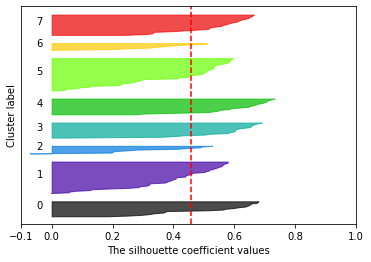

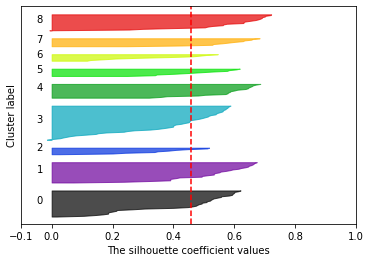

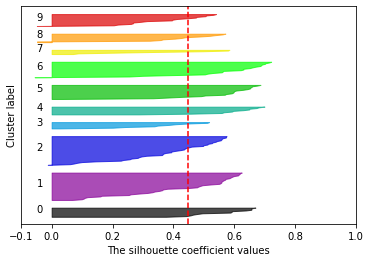

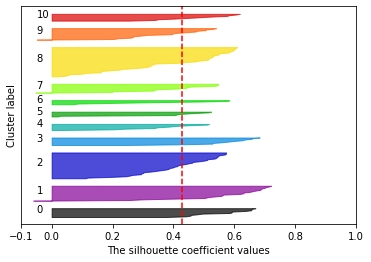

In [65]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
range_n_clusters = [2,3,4,5,7,8,9,10,11]

for n_clusters in range_n_clusters:
    
    fig, ax1 = plt.subplots(1, 1)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()


# building model with best k value

In [163]:
Kmeans_model = KMeans(n_clusters=5)
Kmeans_model.fit(x1)

KMeans(n_clusters=5)

In [164]:
pred_kmeans=Kmeans_model.fit_predict(x1)
pred_kmeans

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [70]:
names=[];s=[]
names.append('K-Means')
s.append(0.5539)

In [165]:
cluster_centroid = Kmeans_model.cluster_centers_
cluster_centroid

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

In [166]:
label = Kmeans_model.labels_
label

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

Text(0.5, 1.0, 'Annual Income vs Spending Score(k-means)')

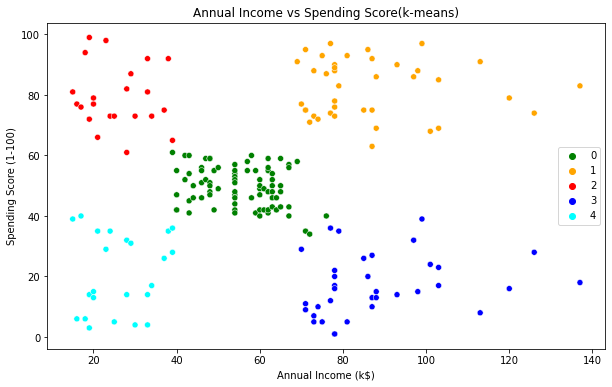

In [167]:
fig=plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'],hue=pred_kmeans,palette=['green','orange','red','blue','cyan'])
plt.title("Annual Income vs Spending Score(k-means)")

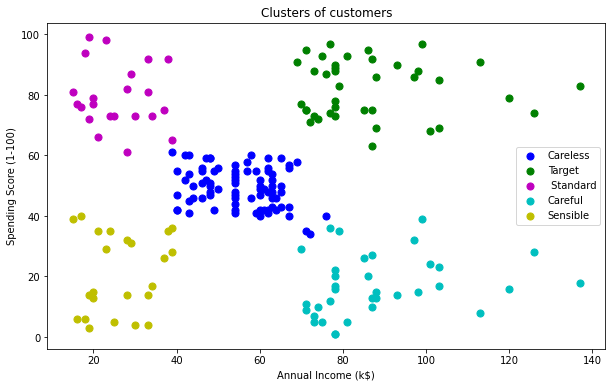

In [169]:

label= ["Careless","Target",' Standard','Careful','Sensible']
c=['b','g','m','c','y']
plt.figure(figsize=(10,6))
for i in range(5):
    plt.scatter(x1[pred_kmeans == [i], 0], x1[pred_kmeans == [i], 1], s = 50, c = c[i], label = label[i])
plt.title('Clusters of customers')
plt.ylabel('Spending Score (1-100)')
plt.xlabel('Annual Income (k$)')
plt.legend()
plt.show()

# Hierarchical Clustering

In [52]:
X=df.iloc[:,[3,4]]

In [53]:
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


### Plotting Dendogram

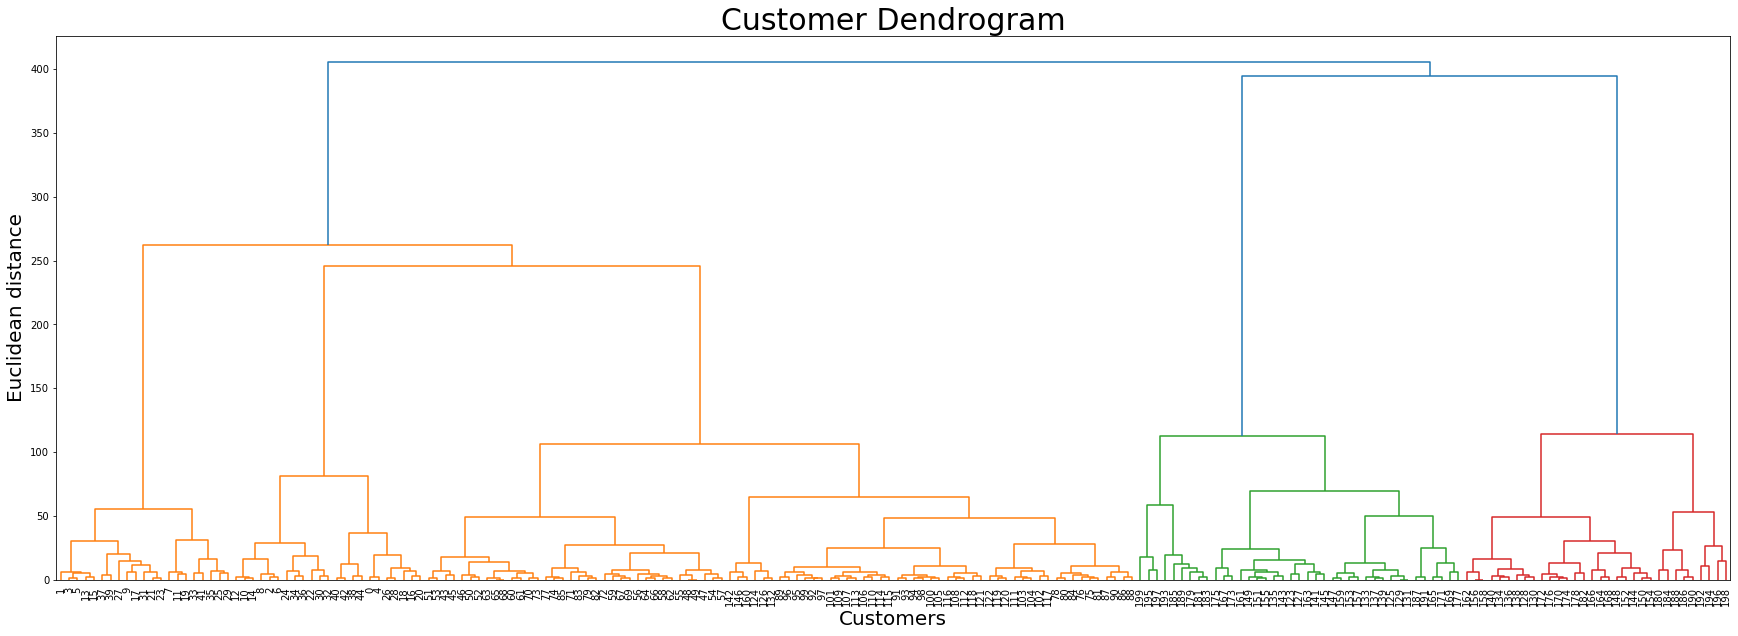

In [54]:
plt.figure(figsize=(30, 10))
dendrogrm = sch.dendrogram(sch.linkage(X, method = 'ward'),labels=df.index)
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title('Customer Dendrogram',fontsize=30)
plt.xlabel('Customers',fontsize=20)
plt.ylabel('Euclidean distance', fontsize=20)
plt.show()

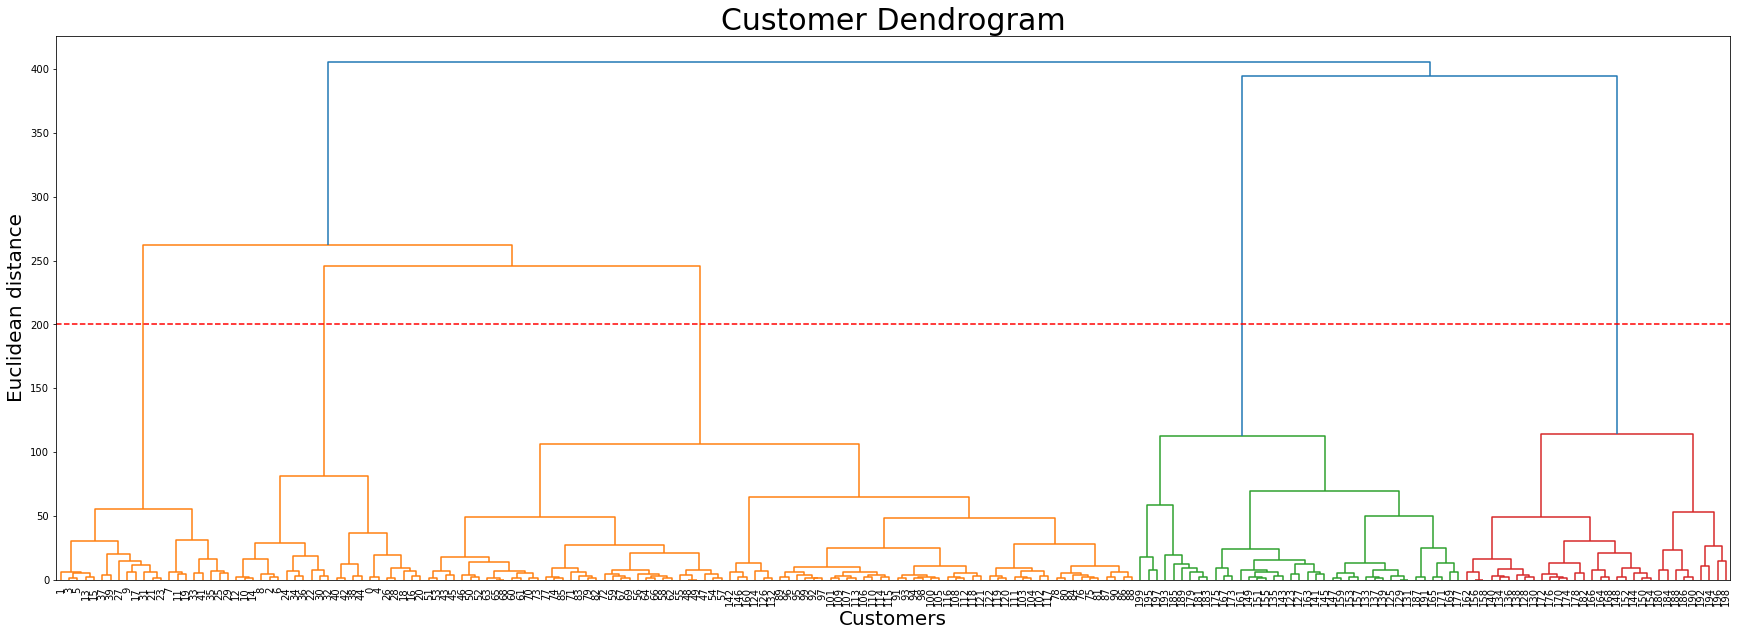

In [56]:
plt.figure(figsize=(30, 10))
dendrogrm = sch.dendrogram(sch.linkage(X, method = 'ward'),labels=df.index)
plt.axhline(y=200, color='r', linestyle='--')
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title('Customer Dendrogram',fontsize=30)
plt.xlabel('Customers',fontsize=20)
plt.ylabel('Euclidean distance', fontsize=20)
plt.show()

### In our case, it's 5. So let's fit the Agglomerative model with 5 clusters

# Model Building

In [96]:
x1=df.iloc[:,[3,4]].values
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x1)

In [59]:
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [84]:
print('Silhouette_score: %0.5f'% metrics.silhouette_score(X,hc.labels_));

Silhouette_score: 0.55299


In [85]:
names.append('Agglomerative')
s.append(0.55299)

### Visualising Clusters

Text(0.5, 1.0, 'Annual Income vs Spending Score(k-means)')

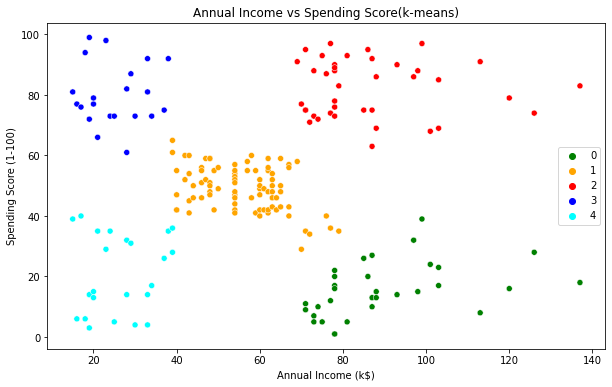

In [91]:
fig=plt.figure(figsize=(10,6))
sns.scatterplot(x=X['Annual Income (k$)'],y=X['Spending Score (1-100)'],hue=y_hc,palette=['green','orange','red','blue','cyan'],legend=['Careful','Standard','Target','Careless','Sensible'])
plt.title("Annual Income vs Spending Score(k-means)")

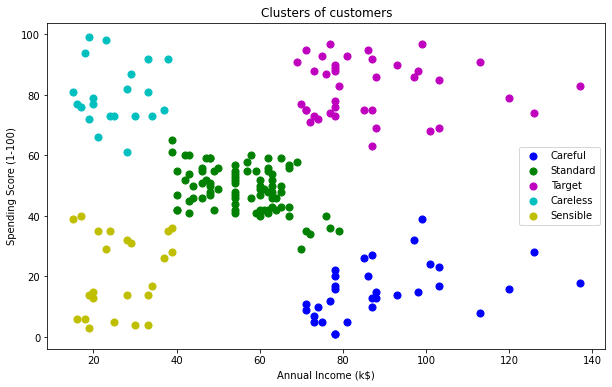

In [100]:

label= ["Careful","Standard",'Target','Careless','Sensible']
c=['b','g','m','c','y']
plt.figure(figsize=(10,6))
for i in range(5):
    plt.scatter(x1[y_hc == [i], 0], x1[y_hc == [i], 1], s = 50, c = c[i], label = label[i])
plt.title('Clusters of customers')
plt.ylabel('Spending Score (1-100)')
plt.xlabel('Annual Income (k$)')
plt.legend()
plt.show()

#### A cluster of customers based on their annual income and spending score

In [105]:
df['labels_agg']=hc.labels_
df['labels_agg'].value_counts()

1    85
2    39
0    32
4    23
3    21
Name: labels_agg, dtype: int64

In [106]:
df[df['labels_agg']==1]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),labels_agg
43,44,0,31,39,61,1
45,46,0,24,39,65,1
46,47,0,50,40,55,1
47,48,0,27,40,47,1
48,49,0,29,40,42,1
...,...,...,...,...,...,...
126,127,1,43,71,35,1
132,133,0,25,72,34,1
142,143,0,28,76,40,1
146,147,1,48,77,36,1


In [107]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),labels_agg
0,1,1,19,15,39,4
1,2,1,21,15,81,3
2,3,0,20,16,6,4
3,4,0,23,16,77,3
4,5,0,31,17,40,4


# DBSCAN clustering

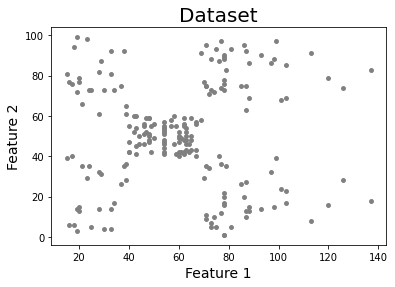

In [102]:
#plt.figure(figsize=(10,10))
plt.scatter(x=X['Annual Income (k$)'],y=X['Spending Score (1-100)'],s=15,color='grey')
plt.title('Dataset',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

In [108]:
dbscan=DBSCAN()
dbscan.fit(X)

DBSCAN()

In [109]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

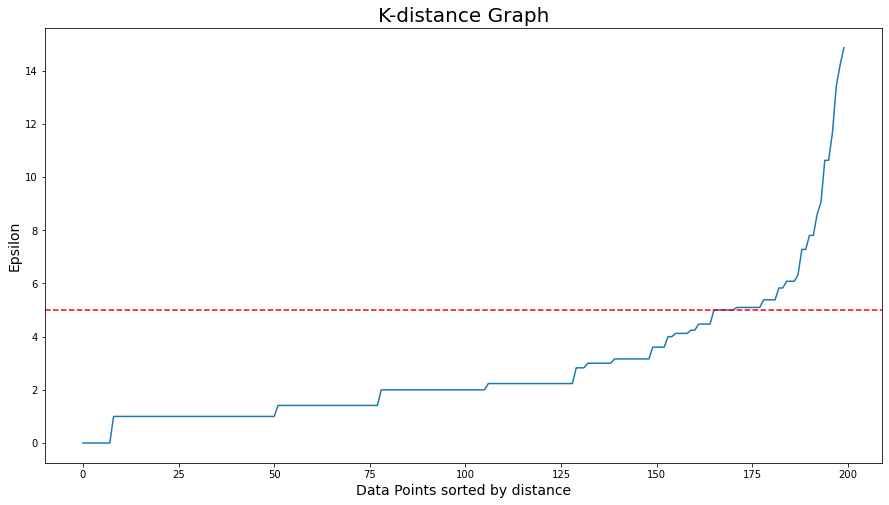

In [111]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(15,8))
plt.plot(distances)
plt.axhline(y=5, color='r', linestyle='--')
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [114]:
eps=5
for min_samples in range(3,12):
    clusterer = DBSCAN(eps=eps, min_samples=min_samples)
    cluster_labels = clusterer.fit_predict(X)

    x= cluster_labels +2
    #print(x)
    y = np.bincount(x)
    #print(y)
    ii = np.nonzero(y)[0]
    #print(ii)
    results = list(zip(ii,y[ii]) )
    print('eps=',eps,'| min_samples= ', min_samples, '| obtained clustering: ', results)
    

eps= 5 | min_samples=  3 | obtained clustering:  [(1, 55), (2, 3), (3, 6), (4, 3), (5, 4), (6, 5), (7, 3), (8, 79), (9, 11), (10, 10), (11, 14), (12, 3), (13, 4)]
eps= 5 | min_samples=  4 | obtained clustering:  [(1, 76), (2, 6), (3, 79), (4, 10), (5, 10), (6, 11), (7, 4), (8, 4)]
eps= 5 | min_samples=  5 | obtained clustering:  [(1, 87), (2, 6), (3, 78), (4, 10), (5, 9), (6, 10)]
eps= 5 | min_samples=  6 | obtained clustering:  [(1, 100), (2, 76), (3, 10), (4, 6), (5, 8)]
eps= 5 | min_samples=  7 | obtained clustering:  [(1, 116), (2, 76), (3, 8)]
eps= 5 | min_samples=  8 | obtained clustering:  [(1, 120), (2, 72), (3, 8)]
eps= 5 | min_samples=  9 | obtained clustering:  [(1, 129), (2, 71)]
eps= 5 | min_samples=  10 | obtained clustering:  [(1, 133), (2, 67)]
eps= 5 | min_samples=  11 | obtained clustering:  [(1, 136), (2, 64)]


In [152]:
dbscan=DBSCAN(eps=5,min_samples=5)
dbscan.fit(X)
ypred_dbscan=dbscan.fit_predict(X)

In [153]:
X['DBSCAN_labels']=dbscan.labels_
X['DBSCAN_labels'].value_counts()

-1    87
 1    78
 2    10
 4    10
 3     9
 0     6
Name: DBSCAN_labels, dtype: int64

Text(0.5, 1.0, 'Annual Income vs Spending Score(k-means)')

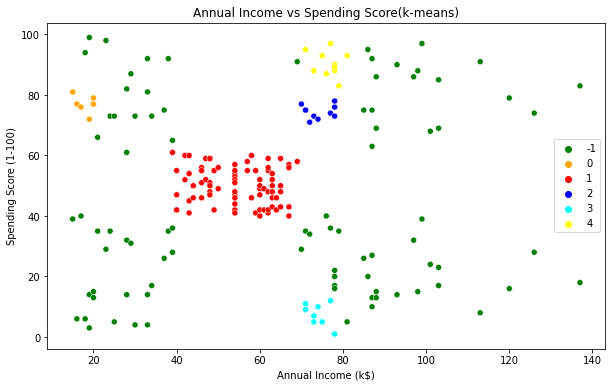

In [154]:
fig=plt.figure(figsize=(10,6))
sns.scatterplot(x=X['Annual Income (k$)'],y=X['Spending Score (1-100)'],hue=ypred_dbscan,palette=['green','orange','red','blue','cyan','yellow'],legend=['Careful','Standard','Target','Careless','Sensible'])
plt.title("Annual Income vs Spending Score(k-means)")

In [155]:
print('Silhouette_score: %0.5f'% metrics.silhouette_score(X,X['DBSCAN_labels']));

Silhouette_score: 0.11597


In [158]:
names.append('DBSCAN')
s.append(0.1159)

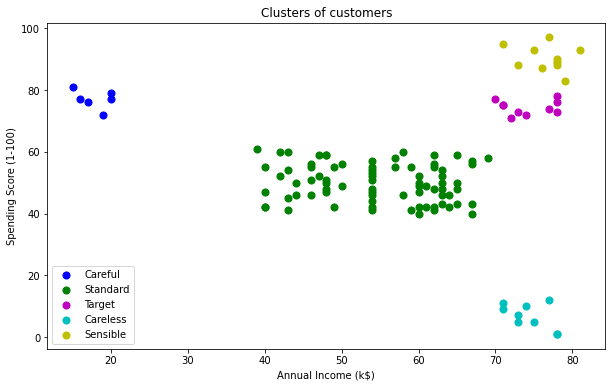

In [141]:

label= ["Careful","Standard",'Target','Careless','Sensible']
c=['b','g','m','c','y']
plt.figure(figsize=(10,6))
for i in range(5):
    plt.scatter(x1[ypred_dbscan == [i], 0], x1[ypred_dbscan == [i], 1], s = 50, c = c[i], label = label[i])
plt.title('Clusters of customers')
plt.ylabel('Spending Score (1-100)')
plt.xlabel('Annual Income (k$)')
plt.legend()
plt.show()

In [159]:
names

['K-Means', 'Agglomerative', 'DBSCAN']

In [160]:
s

[0.5539, 0.55299, 0.1159]

In [171]:
final=pd.DataFrame(list(zip(names,s)),columns=['Algorithm','Silhouette_score']).set_index('Algorithm')
final

,Silhouette_score
Algorithm,
K-Means,0.55390
Agglomerative,0.55299
DBSCAN,0.11590


Text(0.5, 1.0, 'Silhouette score')

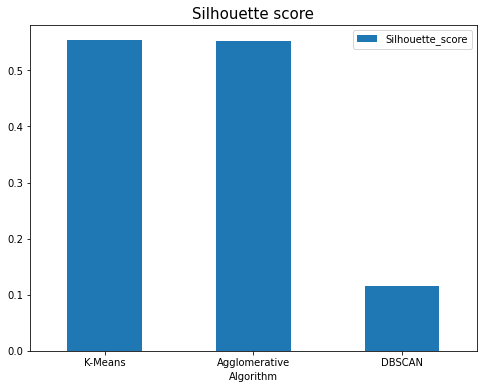

In [172]:
final.plot(kind='bar',figsize=(8,6))
plt.xticks(rotation=0)
plt.title('Silhouette score',fontsize=15)